# Peer Review Assignment 2 - Part I

Name: Moreblessing Machiwenyika

Date: 30/11/2020

# Instructions

* Work through the notebook, answer all questions, and do all problems
* You are allowed to consult the internet, and discuss on the module forum
* Your answers and solutions to the problems should be added to this notebook 
* Submit your final work as an html file
* Note that the solutions to the problems used python version 3.6.4.  

# Marking Scheme (Theoretical Questions)

* All questions are marked out of 3.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 1 mark
* 'Perfect' answer: 3 marks

# Marking Scheme (Practical Problems)
* All problems are marked out of 5.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 2 mark
* Working code: 5 marks

---

# Principal Component Analysis (PCA)
In this exercise you will experiment with PCA. This will also be your first introduction to the scikit-learn library. For more information about the PCA module in the scikit-learn library, go to http://scikit-learn.org/stable/modules/decomposition.html#decompositions.

One of the basic assumptions of machine learning is that the high dimensional data we observe, actually occupies a much lower dimensional manifold. A good description of the low dimensional manifold is highly desirable. In fact, this is exactly what we try to accomplish when we manufacture *features* for our system. In general the manifolds will be nonlinear; PCA is an efficient technique for identifying linear, low dimensional manifolds. 

This idea was exploited when the so-called eigenface approach for facial recognition was developed. Any image lives in a high dimensional space. If the image is $m\times n$ then the dimension of the space is $mn$. This is huge for even modest resolution images. Since we are, for this application, only interested in facial images, the question arises whether the facial images occupy a lower dimensional subspace of the huge image space. If that is the case, the next question is how to describe that space, i.e. how do we extract features suitable for describing the space. 

We'll briefly explore these idea below.

## Import packages

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simple example

In [6]:
# Create synthetic data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# Instantiate and fit PCA model
pca = PCA(n_components=2)
pca.fit(X)

print("Percentage of variance explained by each of the selected components:")
print(pca.explained_variance_ratio_) 

Percentage of variance explained by each of the selected components:
[0.99244289 0.00755711]


## Iris data set
The previous was just a warm-up. We now turn to the iris data set. The idea is to reproduce the image in the scikit-image website. This is one of the famous data sets widely used in machine learning. For more information, see  http://archive.ics.uci.edu/ml/datasets/Iris


The iris data set is imported using load_iris2.py. This converts the class labels to numbers. Since there are 3 classes, the classes are now labelled, 0, 1, and 2.


In [7]:
# Load data
import load_iris as ld
data, classes, labels = ld.load_iris2('./data/iris/iris_train.txt')

Fit the data with PCA.

First fit with 3 principal components in order to investigate how much of the variance is explained by the  components.

---

### Question 1 (3 marks):
Explain the meaning of `explained variance`, i.e. explain the meaning of the graph below..

### Answer:

The graph below represents variance explained by each of principal components. Explained variance here is the ratio between the variance of that principal component and the total variance.

Namely:

1. First principal component explains 92.540219 % of total variance
2. Second principal component explains 6.055593 % of total variance
3. Third principal component explains 1.404188 % of total variance

[0.92540219 0.06055593 0.01404188]


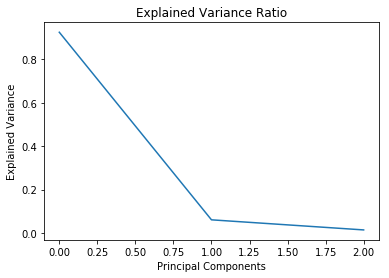

In [9]:
# Fit PCA
pca = PCA(n_components=3)
pca.fit(data)

# Plot
plt.plot(range(0, 3), pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

---
# Projecting the data.

### Problem 1: (**5 marks**)

Project the data onto the first two principal components. Since you have class labels you can plot the 2-dimensional representation of the 3 classes in different colours.  The idea is to see how much class separation is obtained by projecting onto the first two principal components.

You should see something like the following: (**You need to provide the code in the following code cell**)

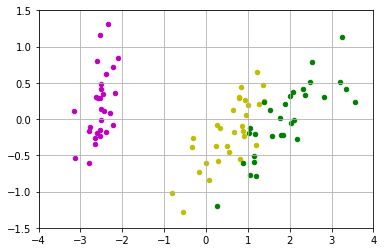

In [30]:
# Insert code to produce the image below  

import pandas as pd

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
labelsDf=pd.DataFrame(labels, columns=['label']) 
finalDf = pd.concat([principalDf, labelsDf], axis = 1)

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
colors = ['m', 'y', 'g']


for single_class, color in zip(classes,colors):
    indicesToKeep = finalDf['label'] == single_class
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'], finalDf.loc[indicesToKeep, 'PC 2'], c = color, s = 20)
    
ax.set_xlim(-4, 4)
ax.set_ylim(-1.5, 1.5)
ax.grid()

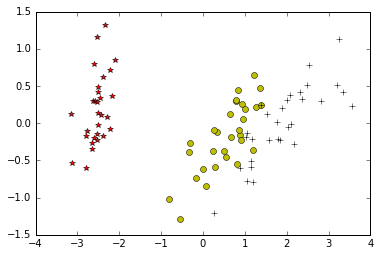

In [6]:
display(Image(filename='./Iris_PCA.png'))

---

## Face recognition

A few years ago facial recognition using the so-called eigenfaces was very much in fashion, see for example https://en.wikipedia.org/wiki/Eigenface. 


We now briefly explore the main ideas behind the eigenface approach using the Olivetti face data base (provided to you). 


First import  all png files from all the directories inside a specified directory. Each  facial image is then converted to a flat array.


In [12]:
# Import all faces as a flattened array
from skimage import io
ic = io.ImageCollection('./data/att_faces/*/*.png')
ic = np.array(ic)
ic_flat = ic.reshape((len(ic), -1))

# Shape of array
number, m, n = ic.shape  

### Viewing the faces
Import an image viewer that allows you to step view all the loaded images using iPython widgets.

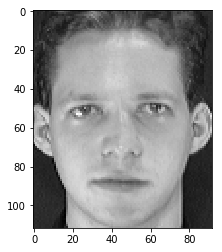

In [13]:
from IPython.html.widgets import interact

def view_image(n=0):
    plt.imshow(ic[n], cmap='gray', interpolation='nearest')
    plt.show()

w = interact(view_image, n=(0, len(ic)-1))

In [14]:
pca = PCA(n_components=200)
pca.fit(ic_flat)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## The ratio of the total variance captured by the principal directions.

The question arises how many principal components are needed to capture a significant amount of information of a face. For this it is useful to calculate the  ratio of the total variance explained by $n$ components. Since this is such a useful quantity to investigate, scikit-learn provides it for us.


Note that the variance drops off very quickly. For something like $n=50$ components a significant proportion of the total variance is already captured. 

---

### Problem 2: (**5 marks**)
Plot the explained variance. You should see something like the following:

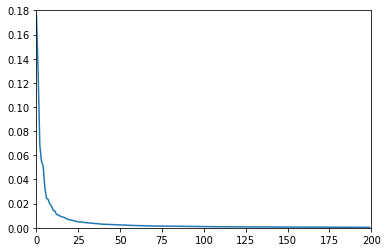

In [15]:
# Insert code to produce the image below

plt.plot(pca.explained_variance_ratio_)
plt.xlim([0, 200])
plt.ylim([0, 0.18])
print()

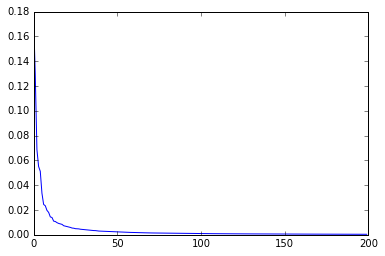

In [16]:
display(Image(filename='./Faces_expl_var.png'))

---

### Projecting the faces onto the eigenfaces.

First project all the images onto the 200 eigenfaces defined above. In order to visualise how much is lost, the projected images are projected back onto the original space. It is then reshaped and displayed.



In [17]:
pr_ic_flat = pca.transform(ic_flat)

back_pr_ic_flat = pca.inverse_transform(pr_ic_flat)

1. Restore flattened array into original shape.
2. View the restored images. 

Keeping in mind that the dimension of the images are reduced from 10304 to 200, the reconstruction is quite good.

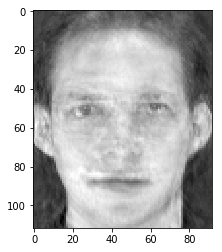

In [18]:
ic_restore = back_pr_ic_flat.reshape((number,m,n))

def view_image(n=0):
    plt.imshow(ic_restore[n],cmap='gray', interpolation='nearest')
    plt.show()

w = interact(view_image, n=(0, len(ic)-1))

## Projecting something else

Above we represented faces used to derive the eigenfaces in terms of the the eigenfaces. Not surprisingly the results are quite good. But the real interest is in faces not part of the training set.

We now project such a face. See what happens if you try some else's face!
First read in the face:

In [20]:
ben = io.ImageCollection('./Ben_bw.png')[0]
ben = np.array(ben)

---
### Problem 3: (**5 marks**)

Display the image as below

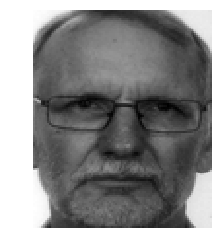

In [21]:
# Insert code to produce the image below

plt.imshow(ben,cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

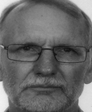

In [18]:
display(Image(filename='./Ben_bw.png'))

### Problem 4: (**5 Marks**)
Flatten the face, project it onto 200 eigenfaces, restore it from the projection, and display. 

You should see something like:

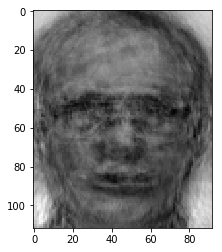

In [22]:
# Insert code to produce the image below

ben_flat = ben.reshape((1,-1))
pr_ben_flat = pca.transform(ben_flat)
back_pr_ben_flat = pca.inverse_transform(pr_ben_flat)
ben_restore = back_pr_ben_flat.reshape((m,n))
plt.imshow(ben_restore,cmap='gray', interpolation='nearest')
plt.show()

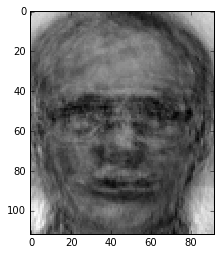

In [20]:
display(Image(filename='./Ben_recon.png'))